In [4]:
%pylab inline
import pandas as pd
from os import listdir
from os.path import isfile, join

Populating the interactive namespace from numpy and matplotlib


In [5]:
mypath = 'WY-Wolves/'
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
games = []
for f in onlyfiles:
    if('vs.' in f):
        idx = f.index('vs.')
        games.append(f[idx + 4:])

games = list(set(games))
games

['BJ-Tornados 2017-05-21_09-00.csv',
 'SC-Warriors 2017-05-09_16-30.csv',
 'CI-Vapour 2017-03-29_16-30.csv',
 'YK-Buddha 2017-03-11_14-30.csv',
 'YW-Dogs 2017-03-24_16-00.csv',
 'NO-Mosquitos1 2017-04-08_11-00.csv',
 'PH-Dogs 2017-03-03_16-00.csv',
 'NM-Lions 2017-05-21_12-20.csv',
 'NM-Lions 2017-03-17_16-00.csv',
 'JK-Sea Otters 2017-03-31_15-45.csv',
 'LW-Kraken 2017-05-20_15-00.csv',
 'CI-Vapour 2017-05-20_12-00.csv',
 'BN-Wolves 2017-04-08_14-45.csv',
 'TJ-Donut1 2017-04-08_13-30.csv',
 'DQ-Cheetahs 2017-02-24_16-15.csv',
 'NM-Lions 2017-05-20_10-00.csv',
 'SC-Warriors 2017-04-21_15-00.csv',
 'HK-Joint 2017-05-20_09-00.csv',
 'DQ-Cheetahs 2017-05-12_15-45.csv',
 'DQ-Cheetahs 2017-03-11_13-40.csv',
 'YW-Dogs 2017-03-11_09-15.csv',
 'YK-Buddha 2017-03-11_12-30.csv',
 'KC-Gators 2017-03-11_11-30.csv',
 'NO-Mosquitos2 2017-04-08_10-00.csv',
 'CI-HZSR 2017-05-21_15-50.csv']

In [6]:
def single_game_single_reciever(player, receiver, df):
    #df should be passed in
    data = {#'Player': receiver,
            'Drops': len(df[df['Receiver error?'] == 1]),
            'Catches': len(df[df['Turnover?'] == 0]),
            'Throwaways': len(df[df['Thrower error?'] == 1]),
            'Attempts': len(df[df['Receiver error?'] == 1]) + len(df[df['Turnover?'] == 0]) + len(df[df['Thrower error?'] == 1]),
            'Goals': len(df[df['Assist?'] == 1])}
    return pd.Series(data)

def single_game_passing_data(thrower, game):
    df = pd.read_csv('WY-Wolves/Passes vs. ' + game)
#     thrower = '#22 Paul Simpson'
    df = df[df['Thrower'] == thrower]
    data = pd.DataFrame(columns=['Drops', 'Catches', 'Catch Pct', 'Throwaways', 'Attempts', 'Goals'], index=['Player'])
    for receiver, frame in df.groupby('Receiver'):
        data.loc[receiver] = single_game_single_reciever(thrower, receiver, frame)

    return data#.sort_values('Throwaways', ascending=False)
# df0 = df[(df['Thrower'] == '#22 Paul Simpson') & (df['Receiver'] == '#1 Joyce Wang')]
# df1 = df[(df['Thrower'] == '#22 Paul Simpson') & (df['Receiver'] == '#14 Cecilia Wu')]
# j = single_game_single_reciever('#22 Paul Simpson', '#1 Joyce Wang', df0)
# c = single_game_single_reciever('#22 Paul Simpson', '#14, Cecilia Wu', df1)

# d = pd.DataFrame([j, c])
# d.set_index('Player')


In [7]:
def player_passing_data(thrower):
    # Statto
    data = single_game_passing_data(thrower, games[0])
    for game in games[1:]:
        data = data.add(single_game_passing_data(thrower, game), fill_value=0)
        
    # Ultianalytics
    return data

In [8]:
player_passing_data('#14 Cecilia Wu').sort_values('Catches',ascending=False)

,Drops,Catches,Catch Pct,Throwaways,Attempts,Goals
#22 Paul Simpson,0,66,NaN,6,72,0
#27 Daniel Zhang,5,43,NaN,11,59,1
#55 Tigger Li,2,35,NaN,3,40,0
#1 Joyce Wang,1,28,NaN,8,37,3
#69 Justin Chen,0,7,NaN,0,7,1
#19 Ben Wang,1,6,NaN,4,11,1
Oscar Yao,1,3,NaN,0,4,0
#0 Julie Luo,0,2,NaN,0,2,0
#66 Jerry Chen,0,2,NaN,2,4,1
Peter,0,2,NaN,1,3,0


In [9]:
ulti_df = pd.read_csv('WY-Wolves/1617SUISWolves-stats.csv')
ulti_df.head()

,Date/Time,Tournamemnt,Opponent,Point Elapsed Seconds,Line,Our Score - End of Point,Their Score - End of Point,Event Type,Action,Passer,...,Begin Area,Begin X,Begin Y,End Area,End X,End Y,Distance Unit of Measure,Absolute Distance,Lateral Distance,Toward Our Goal Distance
0,2016-10-28 16:12,Fall League,YewWah Dogs,171,O,1,0,Offense,Catch,#22 Paul Simpson,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016-10-28 16:12,Fall League,YewWah Dogs,171,O,1,0,Offense,Catch,#14 Cecilia Wu,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016-10-28 16:12,Fall League,YewWah Dogs,171,O,1,0,Offense,Catch,#22 Paul Simpson,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016-10-28 16:12,Fall League,YewWah Dogs,171,O,1,0,Offense,Catch,#14 Cecilia Wu,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016-10-28 16:12,Fall League,YewWah Dogs,171,O,1,0,Offense,Catch,#22 Paul Simpson,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
ulti_df['Action'].unique()

array(['Catch', 'Drop', 'Throwaway', 'Goal', 'Pull', 'D', 'PullOb',
       'Callahan', 'Stall'], dtype=object)

In [11]:
thrower = '#22 Paul Simpson'
def ulti_passing_data(thrower):
    ulti_df = pd.read_csv('WY-Wolves/1617SUISWolves-stats.csv')
    ulti_df = ulti_df[ulti_df['Passer'] == thrower]
    data = pd.DataFrame(columns=['Drops', 'Catches', 'Catch Pct', 'Throwaways', 'Attempts', 'Goals'], index=['Player'])
    for reciever, frame in ulti_df.groupby('Receiver'):
#     d = {#'Player': receiver,
#          'Drops': len(frame[frame['Action'] == 'Drop']),
#          'Catches': len(frame[frame['Action'] == 'Catch']),
#          'Throwaways': len(frame[frame['Action'] == 'Throwaway']),
#          'Goals': len(frame[frame['Action'] == 'Goal'])}
#         catch_pct = 0
#         if len(frame[frame['Action'] == 'Drop']) + len(frame[frame['Action'] == 'Catch']) != 0:
#             catch_pct = len(frame[frame['Action'] == 'Catch']) / (len(frame[frame['Action'] == 'Drop']) + len(frame[frame['Action'] == 'Catch']))
        data.loc[reciever] = pd.Series({'Drops': len(frame[frame['Action'] == 'Drop']),
                                    'Catches': len(frame[frame['Action'] == 'Catch']),
                                    #'Catch Pct': catch_pct,
                                    'Throwaways': len(frame[frame['Action'] == 'Throwaway']),
                                    'Attempts': len(frame[frame['Action'] == 'Drop']) + len(frame[frame['Action'] == 'Catch']) + len(frame[frame['Action'] == 'Throwaway']),
                                    'Goals': len(frame[frame['Action'] == 'Goal'])})
    return data
ulti_passing_data('#22 Paul Simpson').sort_values('Catches', ascending=False)

,Drops,Catches,Catch Pct,Throwaways,Attempts,Goals
#14 Cecilia Wu,4.0,61.0,NaN,0.0,65.0,10.0
#1 Joyce Wang,2.0,25.0,NaN,0.0,27.0,4.0
Chris Xu,6.0,23.0,NaN,0.0,29.0,17.0
# 69 Justin Chen,8.0,18.0,NaN,0.0,26.0,3.0
#27 Daniel Zhang,7.0,13.0,NaN,0.0,20.0,2.0
#55 Tigger Li,5.0,10.0,NaN,0.0,15.0,1.0
#2 Jamie Chen,3.0,9.0,NaN,0.0,12.0,15.0
#28 Tina Zhu,0.0,8.0,NaN,0.0,8.0,0.0
#66 Jerry Chen,2.0,7.0,NaN,0.0,9.0,1.0
#77 Zoe Wu,1.0,5.0,NaN,0.0,6.0,2.0


In [12]:
thrower = '#27 Daniel Zhang'
sdf = player_passing_data(thrower)
udf = ulti_passing_data(thrower)
pdf = sdf.add(udf, fill_value=0)

def catch_percent(row):
        catch_pct = 0
        if row['Drops'] + row['Catches'] != 0:
            catch_pct = row['Catches'] / (row['Drops'] + row['Catches'])
        row['Catch Pct'] = catch_pct
        return row
        
pdf = pdf.apply(catch_percent, axis=1)

In [13]:
pdf.sort_values('Catches', ascending=False)

,Drops,Catches,Catch Pct,Throwaways,Attempts,Goals
#22 Paul Simpson,5.0,155.0,0.968750,15.0,175.0,6.0
#14 Cecilia Wu,7.0,67.0,0.905405,6.0,80.0,6.0
#1 Joyce Wang,7.0,45.0,0.865385,6.0,58.0,2.0
#55 Tigger Li,4.0,42.0,0.913043,15.0,61.0,8.0
#19 Ben Wang,8.0,31.0,0.794872,16.0,55.0,11.0
Oscar Yao,2.0,30.0,0.937500,5.0,37.0,7.0
#41 Billy Ni,2.0,24.0,0.923077,7.0,33.0,6.0
#66 Jerry Chen,1.0,18.0,0.947368,5.0,24.0,1.0
#39 David Xiao,4.0,14.0,0.777778,1.0,19.0,0.0
#2 Jamie Chen,3.0,14.0,0.823529,4.0,21.0,4.0


## Visualization

Polar Scatter

Thrower at $(0, 0)$

Receivers at $(R, \theta), r, color$, where

$R=$ attempts, $\theta$ is calculated so there are no overlaps,
$r=$ number of goals, color = catch pct 

In [14]:
from matplotlib import pyplot as plt
from matplotlib.patches import Circle
from matplotlib.collections import PatchCollection
import matplotlib.colors as colors

In [15]:
min_r = 12

In [16]:
pdf = pdf.sort_values('Attempts',ascending=False)
# pdf = pdf[pdf['Attempts'] > pdf.agg('max')['Attempts'] * .1]
pdf = pdf[:-1]
pdf

,Drops,Catches,Catch Pct,Throwaways,Attempts,Goals
#22 Paul Simpson,5.0,155.0,0.968750,15.0,175.0,6.0
#14 Cecilia Wu,7.0,67.0,0.905405,6.0,80.0,6.0
Anonymous,0.0,0.0,0.000000,63.0,63.0,0.0
#55 Tigger Li,4.0,42.0,0.913043,15.0,61.0,8.0
#1 Joyce Wang,7.0,45.0,0.865385,6.0,58.0,2.0
#19 Ben Wang,8.0,31.0,0.794872,16.0,55.0,11.0
Oscar Yao,2.0,30.0,0.937500,5.0,37.0,7.0
#41 Billy Ni,2.0,24.0,0.923077,7.0,33.0,6.0
#66 Jerry Chen,1.0,18.0,0.947368,5.0,24.0,1.0
#2 Jamie Chen,3.0,14.0,0.823529,4.0,21.0,4.0


In [17]:
pdf.agg(['max', 'min', 'median'])

,Drops,Catches,Catch Pct,Throwaways,Attempts,Goals
max,8.0,155.0,1.000000,63.0,175.0,11.0
min,0.0,0.0,0.000000,0.0,1.0,0.0
median,1.5,4.0,0.811765,1.5,8.0,0.0


#27 Daniel Zhang
Distance from center is number of attempts
Color is catching percent
Size of marker is number of goals


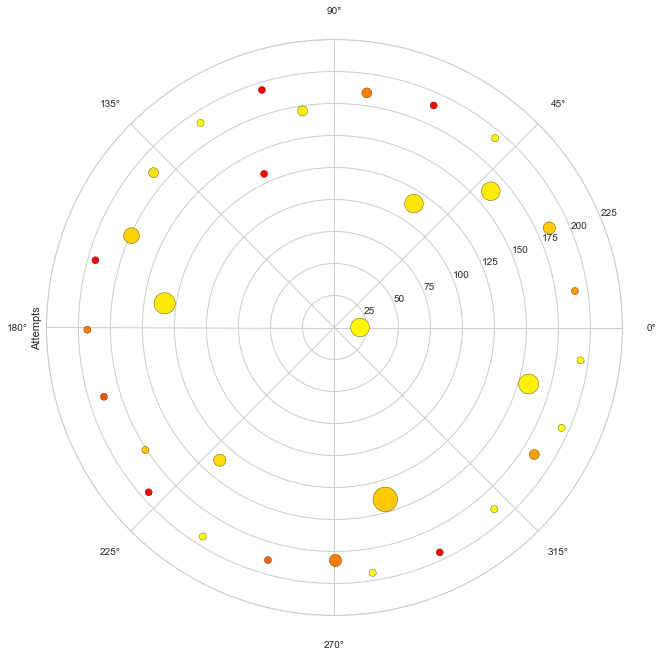

In [21]:
print(thrower)
print('Distance from center is number of attempts')
print('Color is catching percent')
print('Size of marker is number of goals')
center_buffer = 20
goals_scale = 50

color_map = plt.get_cmap('autumn')

fig = plt.figure()
ax = fig.add_axes([0, 0, 2, 2], polar=True)
ax.set_ylim(top=pdf.agg('max')['Attempts'] + 50)
ax.set_ylabel('Attempts')

theta = np.arange(len(pdf))
r = (pdf.agg('max')['Attempts'] + center_buffer) - np.array(pdf['Attempts'])
colors = np.array(pdf['Catch Pct'])
area = (np.array(pdf['Goals']) + 1) * goals_scale

# ax.plot(0, 0, 'bo', markersize=goals_scale, mec='black', label=thrower)
c = ax.scatter(theta, r, c=colors, s=area, cmap=color_map, edgecolors='black')
# how do I put the names on the plot?
# how do I put a colorbar on the plot?

plt.show()

In [19]:
import seaborn as sns

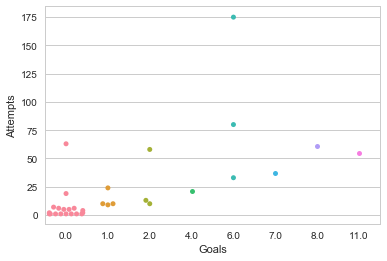

In [20]:
sns.set_style("whitegrid")
ax = sns.swarmplot(y=pdf['Attempts'], x=pdf['Goals'])